<a href="https://colab.research.google.com/github/clint-bg/tools/blob/main/FallingSphereKinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Falling Sphere Kinematics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate
from scipy.optimize import fsolve

In [2]:
#constants
gravity = 9.81 #m/s2
inch2m = 0.0254

## Code to estimate the velocity and position of a falling sphere as a function of time 

Needed variables: <br>
- sphere radius (m)
- sphere density (kg/m3)
- fluid density (kg/m3)
- fluid viscosity (Pa-s)

### First define the net force on the sphere: buoyancy, gravity, and drag

Governing equations

$F_{drag} = -1/2\cdot \rho_{fluid}\cdot v^2 \cdot C_{D}\cdot A$ <br>
$F_{buoyancy} = -\rho_{fluid}\cdot g \cdot V$ <Br>
$F_{gravity} = m\cdot g$

where A is the cross sectional area, $C_D$ is the drag coefficient, $v$ is velocity, $\rho$ is density, V is volume, and m is mass. Assuming a spherical shape, the below function is the net force.

In [3]:
def Re(v,rad,rho_fluid,vis_fluid):
    return rho_fluid*2*rad*v/vis_fluid

In [4]:
def Cdrag(v,rad,rho_fluid,vis_fluid):
    Reyn = Re(v,rad,rho_fluid,vis_fluid)
    Baxter = 24/Reyn + 2.6*(Reyn/5)/(1+(Reyn/5)**1.52)+(0.411*(Reyn/263000)**-7.94)/(1+(Reyn/263000)**-8)+(Reyn**0.8)/461000
    Simple = 24/Reyn*(1+0.15*Reyn**0.687)
    return Baxter

In [5]:
def netforce(v,rad,rho_fluid,rho_sphere,vis_fluid):
    Cd = Cdrag(v,rad,rho_fluid,vis_fluid)
    buoyancyandgravity = (rho_sphere-rho_fluid)/rho_sphere*gravity
    drag = 1/2*rho_fluid*Cd/(rho_sphere*4/3*rad)*v**2
    return buoyancyandgravity - drag

In [6]:
def inverse_netforce(v,rad,rho_fluid,rho_sphere,vis_fluid): #used to for integral of dv/(F/m) = dt
    return (1/netforce(v,rad,rho_fluid,rho_sphere,vis_fluid))

In [7]:
def func(v,rad,rho_sphere,rho_fluid,vis_fluid): #used to solve for the max (terminal) velocity
    Cd = Cdrag(v,rad,rho_fluid,vis_fluid)
    return (v-np.sqrt(8/3*gravity*rad/Cd*(rho_sphere-rho_fluid)/rho_fluid))**2

In [8]:
def vmax(rad,rho_sphere,rho_fluid,vis_fluid):
    return fsolve(func,1,args=(rad,rho_sphere,rho_fluid,vis_fluid))

In [9]:
def time(v,rad,rho_fluid,rho_sphere,vis_fluid):
    return integrate.quad(inverse_netforce, 0, v,args=(rad,rho_fluid,rho_sphere,vis_fluid))

In [10]:
def dis2vmax(pos,vel,vmax):
    finterp = interpolate.interp1d(vel, pos)
    return finterp(vmax*0.98)

In [11]:
def ballistics(rad,rho_fluid,rho_sphere,vis_fluid): #returns the time, position, and velocity
    vmaxh = vmax(rad,rho_sphere,rho_fluid,vis_fluid)
    velArray = np.linspace(vmaxh*0.01,vmaxh*0.999,500)
    tt = [time(each,rad,rho_fluid,rho_sphere,vis_fluid)[0] for each in velArray]
    velArray = np.append(velArray,vmaxh);tt = np.append(tt,max(tt)*3/vmaxh*1.5)
    xpos = np.array([integrate.trapezoid(velArray[:i+1],x=tt[:i+1]) for i,each in enumerate(tt)])
    return tt,xpos,velArray

Specify variables

In [13]:
#property data
rad = 0.006/2 #m
rho_fluid = 1000 #kg/m3
rho_sphere = 7750 #kg/m3
vis_fluid = 1E-3 #Pa*s

In [14]:
vmaxh = vmax(rad,rho_sphere,rho_fluid,vis_fluid)

In [15]:
times,position,velocity = ballistics(rad,rho_fluid,rho_sphere,vis_fluid)

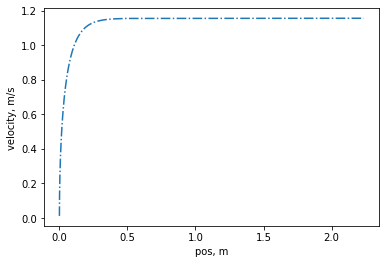

In [16]:
plt.plot(position,velocity,linestyle='-.')
plt.xlabel('pos, m');plt.ylabel('velocity, m/s')
#plt.ylim(0,0.25); plt.xlim(0,1)
plt.show()

The above plot shows how far it would require for the ball the drop to reach terminal velocity

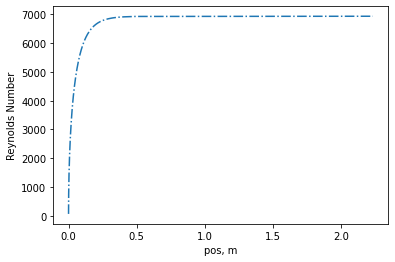

In [17]:
plt.plot(position,Re(velocity,rad,rho_fluid,vis_fluid),linestyle='-.')
plt.xlabel('pos, m');plt.ylabel('Reynolds Number')
#plt.ylim(0,0.25); plt.xlim(0,1)
plt.show()

In [ ]:
#distance to terminal velocity (in)
dis2vmax(position,velocity,max(velocity))*100/2.54

10.086183112581722